In [37]:
import json
import requests
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [42]:
ep = 'https://min-api.cryptocompare.com/data/histohour'
rs = requests.get(ep + '?fsym=EOS&tsym=USD&limit=2000')
cl = pd.DataFrame(json.loads(rs.content)['Data'])

In [43]:
cl.head()

,close,high,low,open,time,volumefrom,volumeto
0,7.08,7.17,7.07,7.16,1531486800,225881.53,1609509.16
1,7.08,7.09,7.05,7.08,1531490400,105117.91,744959.28
2,7.09,7.09,7.03,7.08,1531494000,87699.98,620555.82
3,7.06,7.09,7.04,7.09,1531497600,165157.71,1167312.64
4,7.10,7.11,7.06,7.06,1531501200,196294.54,1391642.72


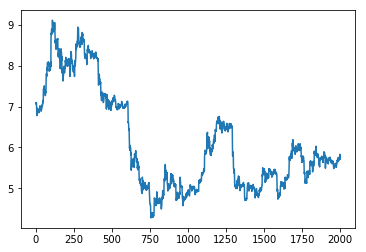

In [45]:
eos = cl.close.values.astype('float32')
eos = eos.reshape(2001,1)
eos.shape
plt.plot(eos)
plt.show()

In [47]:
scl = MinMaxScaler()
cl = cl.as_matrix()
cl = cl.reshape(cl.shape[0],7)
cl = scl.fit_transform(cl)
cl

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[5.79381443e-01, 5.66600398e-01, 5.93429158e-01, ...,
        0.00000000e+00, 3.73634780e-02, 4.49809945e-02],
       [5.79381443e-01, 5.50695825e-01, 5.89322382e-01, ...,
        5.00000000e-04, 1.67369653e-02, 2.01978063e-02],
       [5.81443299e-01, 5.50695825e-01, 5.85215606e-01, ...,
        1.00000000e-03, 1.37619704e-02, 1.66316566e-02],
       ...,
       [3.21649485e-01, 3.06163022e-01, 3.30595483e-01, ...,
        9.99000000e-01, 1.09279625e-01, 1.06991695e-01],
       [3.13402062e-01, 3.02186879e-01, 3.26488706e-01, ...,
        9.99500000e-01, 2.41794237e-02, 2.35714762e-02],
       [2.96907216e-01, 2.92246521e-01, 3.01848049e-01, ...,
        1.00000000e+00, 1.08425792e-01, 1.03683687e-01]])

In [48]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1594
399
1594
399


In [55]:
model = Sequential()
model.add(LSTM(50,input_shape=(7,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=88,validation_data=(X_test,y_test),shuffle=False)

Train on 1594 samples, validate on 399 samples
Epoch 1/88
1594/1594 [==============================] - 2s 1ms/step - loss: 0.0823 - val_loss: 5.3543e-04
Epoch 2/88
1594/1594 [==============================] - 0s 222us/step - loss: 0.0076 - val_loss: 7.5367e-04
Epoch 3/88
1594/1594 [==============================] - 0s 216us/step - loss: 0.0038 - val_loss: 4.8951e-04
Epoch 4/88
1594/1594 [==============================] - 0s 214us/step - loss: 0.0032 - val_loss: 3.8565e-04
Epoch 5/88
1594/1594 [==============================] - 0s 209us/step - loss: 0.0030 - val_loss: 3.7460e-04
Epoch 6/88
1594/1594 [==============================] - 0s 217us/step - loss: 0.0027 - val_loss: 3.7122e-04
Epoch 7/88
1594/1594 [==============================] - 0s 216us/step - loss: 0.0027 - val_loss: 4.1490e-04
Epoch 8/88
1594/1594 [==============================] - 0s 214us/step - loss: 0.0028 - val_loss: 4.3628e-04
Epoch 9/88
1594/1594 [==============================] - 0s 228us/step - loss: 0.0027 - val_

Epoch 76/88
1594/1594 [==============================] - 0s 223us/step - loss: 0.0015 - val_loss: 2.9460e-04
Epoch 77/88
1594/1594 [==============================] - 0s 227us/step - loss: 0.0012 - val_loss: 2.4046e-04
Epoch 78/88
1594/1594 [==============================] - 0s 206us/step - loss: 0.0012 - val_loss: 2.8787e-04
Epoch 79/88
1594/1594 [==============================] - 0s 207us/step - loss: 0.0013 - val_loss: 2.4590e-04
Epoch 80/88
1594/1594 [==============================] - 0s 214us/step - loss: 0.0012 - val_loss: 2.4344e-04
Epoch 81/88
1594/1594 [==============================] - 0s 214us/step - loss: 0.0012 - val_loss: 2.4736e-04
Epoch 82/88
1594/1594 [==============================] - 0s 213us/step - loss: 0.0011 - val_loss: 2.4923e-04
Epoch 83/88
1594/1594 [==============================] - 0s 210us/step - loss: 0.0013 - val_loss: 2.8241e-04
Epoch 84/88
1594/1594 [==============================] - 0s 219us/step - loss: 0.0013 - val_loss: 2.3991e-04
Epoch 85/88
1594/15

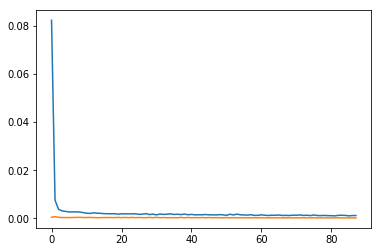

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])